<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/Titanic_Tree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
# Шаг 1. Загрузка данных
# Загружаем обучающие и тестовые данные из CSV-файлов
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [3]:
# Выводим размеры датасетов, чтобы понять, сколько строк и столбцов в каждом
print(f"Размер обучающего набора: {train_data.shape}")
print(f"Размер тестового набора: {test_data.shape}")

Размер обучающего набора: (891, 12)
Размер тестового набора: (418, 11)


In [5]:
# Смотрим первые 5 строк обучающего датасета (в транспонированном виде — строки становятся столбцами)
train_data.head().transpose()

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [6]:
# Проверяем, есть ли пропущенные значения (NaN) в обучающем датасете
print("Количество пропущенных значений в каждом столбце:")
print(train_data.isna().sum())

Количество пропущенных значений в каждом столбце:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Шаг 2. Обработка пропущенных значений
# Заполняем пропуски в столбце 'Age' средним значением по этому столбцу
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [8]:
# Шаг 3. Определение признаков
# Выделяем категориальные и числовые признаки для дальнейшей обработки
cat_features = ['Sex', 'Embarked']  # категориальные признаки
num_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  # числовые признаки

In [9]:
print(f"Категориальные признаки: {cat_features}")
print(f"Числовые признаки: {num_features}")

Категориальные признаки: ['Sex', 'Embarked']
Числовые признаки: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [11]:
# Используем OneHotEncoder для преобразования категориальных переменных в числовые
encoder = OneHotEncoder()
encoder.fit(train_data[cat_features])  # обучаем кодировщик на данных

OneHotEncoder()

In [ ]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S', nan], dtype=object)]

In [12]:
# Получаем названия новых столбцов после кодирования
categories = []
for i, feature in enumerate(cat_features):
    categories.extend([f'{feature}:{value}' for value in encoder.categories_[i]])

print(f"Новые столбцы после кодирования: {categories}")

Новые столбцы после кодирования: ['Sex:female', 'Sex:male', 'Embarked:C', 'Embarked:Q', 'Embarked:S', 'Embarked:nan']


In [13]:
# Добавляем закодированные столбцы в исходный датасет
train_data.loc[:, categories] = encoder.transform(train_data[cat_features]).toarray()

# Смотрим, как выглядит датасет после добавления закодированных столбцов
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex:female,Sex:male,Embarked:C,Embarked:Q,Embarked:S,Embarked:nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
# Шаг 5. Подготовка данных для модели
# Формируем матрицу признаков (X) и вектор целевых значений (y)
X = train_data[categories + num_features]  # все признаки (закодированные + числовые)
y = train_data['Survived']  # целевая переменная (выжил/не выжил)

print(f"Размер матрицы признаков X: {X.shape}")
print(f"Размер вектора целевых значений y: {y.shape}")

Размер матрицы признаков X: (891, 11)
Размер вектора целевых значений y: (891,)


In [21]:
# Шаг 6. Разделение данных на обучающую и тестовую выборки
# Разделяем данные с сохранением пропорций классов (stratify=y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Проверяем распределение классов в обучающей и тестовой выборках
print("Распределение классов в обучающей выборке (в %):")
print(round(y_train.value_counts() / y_train.shape[0] * 100, 2))
print("Распределение классов в тестовой выборке (в %):")
print(round(y_test.value_counts() / y_test.shape[0] * 100, 2))

Распределение классов в обучающей выборке (в %):
Survived
0    61.64
1    38.36
Name: count, dtype: float64
Распределение классов в тестовой выборке (в %):
Survived
0    61.57
1    38.43
Name: count, dtype: float64


In [23]:
def get_score(model):
    """
    Оценивает качество работы модели на обучающей и тестовой выборках.
    Вычисляет три ключевые метрики: ROC‑AUC, точность (accuracy) и F1‑меру.

    Параметры:
    - model: обученная модель машинного обучения (должна поддерживать метод predict_proba)

    Возвращает:
    - DataFrame с двумя строками (Train/Test) и четырьмя колонками (Type, roc_auc, accuracy, f1)
    """
    result = []  # Создаём пустой список для хранения результатов

    # --- Оценка на обучающей выборке (X_train, y_train) ---
    y_pred = model.predict_proba(X_train)  # Получаем вероятности принадлежности к классам для обучающей выборки
                                        # Результат: массив, где каждая строка — объект, каждый столбец — вероятность класса

    # Вычисляем ROC‑AUC (площадь под ROC‑кривой)
    # Используем вероятности класса "1" (y_pred[:, 1]) и истинные метки y_train
    roc_auc = roc_auc_score(y_train, y_pred[:, 1])

    # Вычисляем точность (accuracy) — долю правильных предсказаний
    # y_pred.argmax(axis=1) выбирает класс с максимальной вероятностью для каждого объекта
    accuracy = accuracy_score(y_train, y_pred.argmax(axis=1))

    # Вычисляем F1‑меру — гармоническое среднее точности и полноты
    # Учитывает как ложноположительные, так и ложноотрицательные ошибки
    f1 = f1_score(y_train, y_pred.argmax(axis=1))

    # Добавляем результаты для обучающей выборки в список
    # Округляем метрики до 2 знаков после запятой для наглядности
    result.append(['Train', round(roc_auc, 2), round(accuracy, 2), round(f1, 2)])

    # --- Оценка на тестовой выборке (X_test, y_test) ---
    y_pred = model.predict_proba(X_test)  # Аналогично получаем вероятности для тестовой выборки

    # Повторяем расчёты метрик для тестовой выборки
    roc_auc = roc_auc_score(y_test, y_pred[:, 1])
    accuracy = accuracy_score(y_test, y_pred.argmax(axis=1))
    f1 = f1_score(y_test, y_pred.argmax(axis=1))

    # Добавляем результаты для тестовой выборки в список
    result.append(['Test', round(roc_auc, 2), round(accuracy, 2), round(f1, 2)])

    # Преобразуем список результатов в таблицу (DataFrame)
    # Задаём названия колонок: Type (выборка), roc_auc, accuracy, f1
    return pd.DataFrame(
        columns=['Type', 'roc_auc', 'accuracy', 'f1'],
        data=result
    )

In [22]:
# Шаг 7. Функция для оценки качества модели
def get_score1(model, X_train, y_train, X_test, y_test):
    """
    Оценивает качество модели на обучающей и тестовой выборках.

    Параметры:
    - model: обученная модель с методом predict_proba
    - X_train, y_train: обучающие данные (признаки и целевые значения)
    - X_test, y_test: тестовые данные (признаки и целевые значения)

    Возвращает:
    - DataFrame с метриками качества для обучающей и тестовой выборок
    """
    result = []  # список для хранения результатов

    # Оценка на обучающей выборке
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]  # вероятности класса 1
    y_pred_train = (y_pred_proba_train > 0.5).astype(int)  # бинарные предсказания (0 или 1)

    # Рассчитываем метрики качества
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    # Добавляем результаты для обучающей выборки
    result.append(['Train', roc_auc_train, accuracy_train, f1_train])

    # Оценка на тестовой выборке
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    y_pred_test = (y_pred_proba_test > 0.5).astype(int)

    roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Добавляем результаты для тестовой выборки
    result.append(['Test', roc_auc_test, accuracy_test, f1_test])

    # Возвращаем результаты в виде таблицы (DataFrame)
    return pd.DataFrame(
        columns=['Type', 'roc_auc', 'accuracy', 'f1'],
        data=result
    )

In [24]:
# Шаг 8. Обучение базовой модели
# Создаём и обучаем дерево решений без настройки гиперпараметров
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# Оцениваем качество базовой модели
print("Качество базовой модели:")
print(get_score1(tree, X_train, y_train, X_test, y_test))

Качество базовой модели:
    Type   roc_auc  accuracy        f1
0  Train  0.999090  0.980738  0.974359
1   Test  0.732539  0.753731  0.670000


In [27]:
# Шаг 9. Настройка гиперпараметров с помощью GridSearchCV
# Определяем сетку параметров для поиска оптимальных значений
grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 5, 7],
    'min_samples_leaf': [4, 5, 6, 7],
    'min_impurity_decrease': [0.005, 0.007, 0.01, 0.012]
}

# Создаём объект GridSearchCV и обучаем его
search = GridSearchCV(tree, grid)
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7],
                         'min_impurity_decrease': [0.005, 0.007, 0.01, 0.012],
                         'min_samples_leaf': [4, 5, 6, 7]})

In [28]:
# Выводим лучшие параметры, найденные в процессе поиска
print("Лучшие параметры модели:")
print(search.best_params_)

Лучшие параметры модели:
{'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 4}


In [29]:
# Шаг 10. Обучение модели с лучшими параметрами
# Создаём дерево решений с оптимальными гиперпараметрами
tree1 = DecisionTreeClassifier(**search.best_params_)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       min_impurity_decrease=0.01, min_samples_leaf=4)

In [30]:
get_score(tree1)

Качество модели с лучшими параметрами:
    Type   roc_auc  accuracy        f1
0  Train  0.863603  0.839486  0.757282
1   Test  0.829067  0.787313  0.674286


In [31]:
# Оцениваем качество модели с настроенными параметрами
print("Качество модели с лучшими параметрами:")
print(get_score1(tree1, X_train, y_train, X_test, y_test))

Качество модели с лучшими параметрами:
    Type   roc_auc  accuracy        f1
0  Train  0.863603  0.839486  0.757282
1   Test  0.829067  0.787313  0.674286


In [32]:
# Шаг 11. Анализ важности признаков
# Выводим важность каждого признака в модели
print("Важность признаков в модели:")
feature_importance_df = pd.DataFrame({
    'features': categories + num_features,
    'importances': tree1.feature_importances_
}).sort_values('importances', ascending=False)

print(feature_importance_df.iloc[:5])  # показываем 5 самых важных признаков

Важность признаков в модели:
      features  importances
1     Sex:male     0.596190
6       Pclass     0.234962
7          Age     0.126511
10        Fare     0.042338
0   Sex:female     0.000000


In [33]:
# Шаг 12. Повторная оптимизация гиперпараметров (углублённый поиск)
# Задаём новую сетку параметров для поиска — сужаем диапазон max_depth до малых значений
grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],        # критерии разделения узлов
    'max_depth': [1, 2, 3],                           # максимальная глубина дерева (малые значения для простоты)
    'min_samples_leaf': [4, 5, 6, 7],             # минимальное число объектов в листе
    'min_impurity_decrease': [0.005, 0.007, 0.01, 0.012]  # порог уменьшения нечистоты
}

# Создаём объект GridSearchCV: он будет перебирать все комбинации параметров из grid
search = GridSearchCV(tree, grid)

# Обучаем поисковик на обучающей выборке — он подберёт лучшие параметры
search.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'min_impurity_decrease': [0.005, 0.007, 0.01, 0.012],
                         'min_samples_leaf': [4, 5, 6, 7]})

In [34]:
# Выводим лучшие параметры, которые дал поиск
print("Лучшие параметры после углублённого поиска:")
print(search.best_params_)

Лучшие параметры после углублённого поиска:
{'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.005, 'min_samples_leaf': 4}


In [35]:
# Шаг 13. Обучение финальной модели с лучшими параметрами
# Создаём дерево решений, используя найденные оптимальные параметры
tree2 = DecisionTreeClassifier(**search.best_params_)

# Обучаем модель на обучающей выборке
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0.005,
                       min_samples_leaf=4)

In [36]:
# Шаг 14. Оценка качества финальной модели
# Оцениваем модель на обучающей и тестовой выборках с помощью функции get_score
print("Качество финальной модели:")
print(get_score1(tree2, X_train, y_train, X_test, y_test))

Качество финальной модели:
    Type   roc_auc  accuracy        f1
0  Train  0.859811  0.828250  0.733167
1   Test  0.832657  0.787313  0.666667


In [37]:
# Шаг 15. Анализ важности признаков финальной модели
# Создаём таблицу с признаками и их важностью (вклад в предсказания модели)
feature_importance_df = pd.DataFrame({
    'Feature': categories + num_features,           # названия признаков
    'Importance': tree2.feature_importances_       # важность каждого признака
})

# Сортируем признаки по важности (от самых важных к менее важным)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Выводим полную таблицу важности признаков
print("Важность признаков в финальной модели:")
print(feature_importance_df)


Важность признаков в финальной модели:
         Feature  Importance
0     Sex:female    0.663183
6         Pclass    0.191499
7            Age    0.097022
10          Fare    0.048296
1       Sex:male    0.000000
2     Embarked:C    0.000000
3     Embarked:Q    0.000000
5   Embarked:nan    0.000000
4     Embarked:S    0.000000
8          SibSp    0.000000
9          Parch    0.000000


[Text(0.4444444444444444, 0.875, 'Sex:female <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]'),
 Text(0.2222222222222222, 0.625, 'Age <= 3.5\ngini = 0.304\nsamples = 406\nvalue = [330, 76]'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.3333333333333333, 0.375, 'Pclass <= 1.5\ngini = 0.276\nsamples = 394\nvalue = [329, 65]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.462\nsamples = 80\nvalue = [51, 29]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.203\nsamples = 314\nvalue = [278, 36]'),
 Text(0.6666666666666666, 0.625, 'Pclass <= 2.5\ngini = 0.374\nsamples = 217\nvalue = [54, 163]'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.112\nsamples = 117\nvalue = [7, 110]'),
 Text(0.7777777777777778, 0.375, 'Fare <= 7.888\ngini = 0.498\nsamples = 100\nvalue = [47, 53]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.334\nsamples = 33\nvalue = [7, 26]'),
 Text(

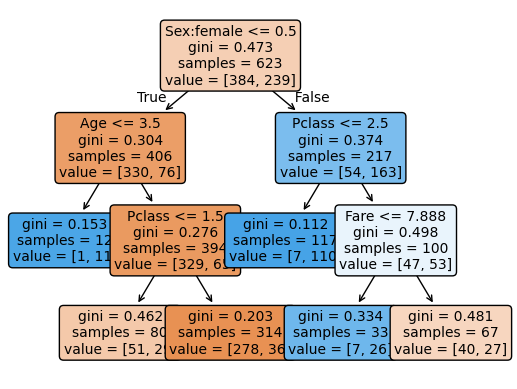

In [38]:
# Шаг 16. Визуализация дерева решений
# Рисуем графическое представление дерева решений
# feature_names — подписи для узлов дерева (названия признаков)
plot_tree(
    tree2,
    feature_names=categories + num_features,
    filled=True,           # заливка узлов цветом (по классам)
    rounded=True,          # скруглённые углы у узлов
    fontsize=10            # размер шрифта в узлах
)

# Примечание: для отображения графика в Jupyter Notebook обычно достаточно этой строки.
# Если график не отображается, можно добавить:
# import matplotlib.pyplot as plt
# plt.show()